In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Creating a pandas dataframe from reviews.excel file
try:
  mydata=pd.read_excel('/content/Bigbasket 235687 Reviews.xlsx')
except Exception:
  pass

In [4]:
mydata.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,f793d90d-73dc-4810-9f1c-6f2d6cd4658c,Tanu Sharma,https://play-lh.googleusercontent.com/a/ALm5wu...,Nice but price higher than jio mart,5,0,NaN,2022-10-19 08:19:18,Your happiness and ease is our prime importanc...,2022-10-19 08:35:29
1,f8a9f795-01a2-405d-8be2-acedce6ad56d,Mahesh Mahi,https://play-lh.googleusercontent.com/a/ALm5wu...,good fresh products... Well service... On time...,5,0,7.6.0,2022-10-19 08:04:47,Thank you for taking the time to write about y...,2022-10-19 08:20:25
2,d8d1bed2-4551-4d97-9fec-9fa7464e2e7f,Ramesh Datla,https://play-lh.googleusercontent.com/a/ALm5wu...,Fast and easy using and ordering. Will wait an...,4,0,7.6.2,2022-10-19 08:04:16,We greatly appreciate your business…. Thank yo...,2022-10-19 08:07:07
3,bee55523-b64c-4420-8889-f08e3bb896a2,swechchha sarojkar,https://play-lh.googleusercontent.com/a-/ACNPE...,Fake one. If u cancelled an order believe me t...,1,0,7.6.2,2022-10-19 07:37:46,"Hi, Please accept our sincere apology. We are ...",2022-10-19 07:55:20
4,c7a61b2a-e044-4c2e-9917-fc4a008cefb2,sam shinchan,https://play-lh.googleusercontent.com/a-/ACNPE...,Didn't enjoy shipping nothing I'm really sugge...,1,0,7.6.2,2022-10-19 07:36:21,"Hi sam, Please accept our sincere apology. We ...",2022-10-19 07:42:29


In [5]:
mydata = mydata.drop(['reviewId','userImage','thumbsUpCount','reviewCreatedVersion','at','replyContent','repliedAt'],axis=1)
mydata.head()

,userName,content,score
0,Tanu Sharma,Nice but price higher than jio mart,5
1,Mahesh Mahi,good fresh products... Well service... On time...,5
2,Ramesh Datla,Fast and easy using and ordering. Will wait an...,4
3,swechchha sarojkar,Fake one. If u cancelled an order believe me t...,1
4,sam shinchan,Didn't enjoy shipping nothing I'm really sugge...,1


In [6]:
mydata = mydata.dropna(axis=0)
mydata

,userName,content,score
0,Tanu Sharma,Nice but price higher than jio mart,5
1,Mahesh Mahi,good fresh products... Well service... On time...,5
2,Ramesh Datla,Fast and easy using and ordering. Will wait an...,4
3,swechchha sarojkar,Fake one. If u cancelled an order believe me t...,1
4,sam shinchan,Didn't enjoy shipping nothing I'm really sugge...,1
...,...,...,...
235682,A Google user,Crashed 5/5 times I tried. Till date I never n...,1
235683,A Google user,Services from big basket really good. App is ...,4
235684,A Google user,Excellent,5
235685,A Google user,This app made our life simple.. I had retirem...,5


In [7]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

def clean1(text):
# Removes all special characters and the alphabets leaving the numericals
    text = re.sub('[^0-9]+', ' ',str(text))
    return text
  

# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['content'].apply(clean)
mydata['cleaned Rating'] = mydata['score'].apply(clean1)
mydata.head()

,userName,content,score,Cleaned Reviews,cleaned Rating
0,Tanu Sharma,Nice but price higher than jio mart,5,Nice but price higher than jio mart,5
1,Mahesh Mahi,good fresh products... Well service... On time...,5,good fresh products Well service On time deliv...,5
2,Ramesh Datla,Fast and easy using and ordering. Will wait an...,4,Fast and easy using and ordering Will wait and...,4
3,swechchha sarojkar,Fake one. If u cancelled an order believe me t...,1,Fake one If u cancelled an order believe me th...,1
4,sam shinchan,Didn't enjoy shipping nothing I'm really sugge...,1,Didn t enjoy shipping nothing I m really sugge...,1


In [8]:
data = mydata.drop(['content','userName','score'],axis=1)
data.head()

,Cleaned Reviews,cleaned Rating
0,Nice but price higher than jio mart,5
1,good fresh products Well service On time deliv...,5
2,Fast and easy using and ordering Will wait and...,4
3,Fake one If u cancelled an order believe me th...,1
4,Didn t enjoy shipping nothing I m really sugge...,1


In [9]:
rating_transform=list()
for i in data["cleaned Rating"]:
  if(int(i)<2):
    i=-1
  elif(int(i)>4):
    i=1
  else:
    i=0
  rating_transform.append(i)

In [10]:
data["rating_transform"]=rating_transform
data=data.drop("cleaned Rating",axis=1)
data.head()

,Cleaned Reviews,rating_transform
0,Nice but price higher than jio mart,1
1,good fresh products Well service On time deliv...,1
2,Fast and easy using and ordering Will wait and...,0
3,Fake one If u cancelled an order believe me th...,-1
4,Didn t enjoy shipping nothing I m really sugge...,-1


In [11]:
data['rating_transform'].value_counts()

 1    141619
 0     49800
-1     44241
Name: rating_transform, dtype: int64

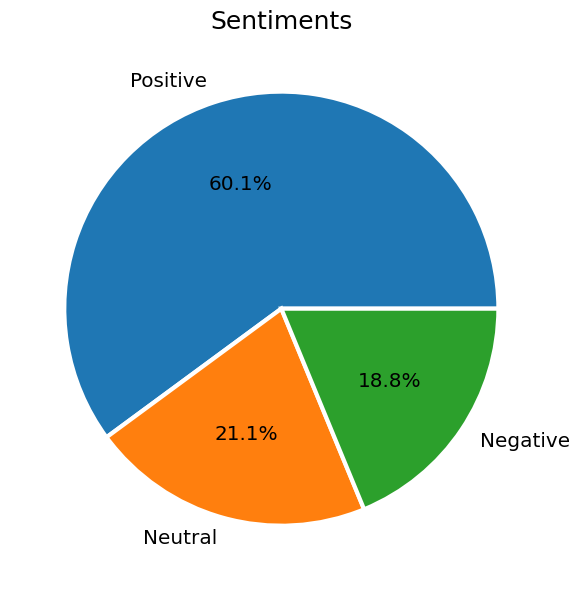

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(6, 6))

Count=["141619",'49800','44241']
lables1=['Positive','Neutral','Negative']
ax.pie(Count, labels=lables1, autopct='%.1f%%',
       wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'})
ax.set_title('Sentiments', fontsize=18)
plt.tight_layout()

#Parts of Speech Tag

In [13]:
import nltk
nltk.download('punkt')
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')


# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

data['POS tagged'] = data['Cleaned Reviews'].apply(token_stop_pos)
data.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Cleaned Reviews,rating_transform,POS tagged
0,Nice but price higher than jio mart,1,"[(Nice, n), (price, n), (higher, a), (jio, Non..."
1,good fresh products Well service On time deliv...,1,"[(good, a), (fresh, n), (products, n), (Well, ..."
2,Fast and easy using and ordering Will wait and...,0,"[(Fast, n), (easy, a), (using, v), (ordering, ..."
3,Fake one If u cancelled an order believe me th...,-1,"[(Fake, n), (one, None), (u, a), (cancelled, v..."
4,Didn t enjoy shipping nothing I m really sugge...,-1,"[(enjoy, n), (shipping, v), (nothing, n), (rea..."


In [14]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos: 
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:  
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew
    
data['Lemma'] =data['POS tagged'].apply(lemmatize)
data.head()

,Cleaned Reviews,rating_transform,POS tagged,Lemma
0,Nice but price higher than jio mart,1,"[(Nice, n), (price, n), (higher, a), (jio, Non...",Nice price high jio mart
1,good fresh products Well service On time deliv...,1,"[(good, a), (fresh, n), (products, n), (Well, ...",good fresh product Well service time deliver...
2,Fast and easy using and ordering Will wait and...,0,"[(Fast, n), (easy, a), (using, v), (ordering, ...",Fast easy use order wait see delivery qualit...
3,Fake one If u cancelled an order believe me th...,-1,"[(Fake, n), (one, None), (u, a), (cancelled, v...",Fake one u cancel order believe refund yr am...
4,Didn t enjoy shipping nothing I m really sugge...,-1,"[(enjoy, n), (shipping, v), (nothing, n), (rea...",enjoy ship nothing really suggest people dow...


#Lematization

# **TextBlob**

In [15]:
from textblob import TextBlob

# function to calculate subjectivity

def getSubjectivity(Description):
    return TextBlob(Description).sentiment.subjectivity

    # function to calculate polarity

def getPolarity(Description):
    return TextBlob(Description).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score <= -0.5:
        return 'Negative'
    elif score >= 0.5:
        return 'Positive'
    else:
        return 'Neutral'

In [16]:
fin_data = pd.DataFrame(data[['Cleaned Reviews', 'Lemma']])
print(fin_data)

                                          Cleaned Reviews  \
0                     Nice but price higher than jio mart   
1       good fresh products Well service On time deliv...   
2       Fast and easy using and ordering Will wait and...   
3       Fake one If u cancelled an order believe me th...   
4       Didn t enjoy shipping nothing I m really sugge...   
...                                                   ...   
235682  Crashed times I tried Till date I never need t...   
235683  Services from big basket really good App is ve...   
235684                                          Excellent   
235685  This app made our life simple I had retirement...   
235686  Much awaited app This will be a lot more conve...   

                                                    Lemma  
0                                Nice price high jio mart  
1         good fresh product Well service time deliver...  
2         Fast easy use order wait see delivery qualit...  
3         Fake one u cancel

In [17]:
fin_data['Lemma']=fin_data['Lemma'].astype(str)

In [18]:
fin_data['Subjectivity'] = fin_data['Lemma'].apply(getSubjectivity) 
fin_data['Polarity'] = fin_data['Lemma'].apply(getPolarity) 
fin_data['Analysis'] = fin_data['Polarity'].apply(analysis)
fin_data.head()


,Cleaned Reviews,Lemma,Subjectivity,Polarity,Analysis
0,Nice but price higher than jio mart,Nice price high jio mart,0.770000,0.380000,Neutral
1,good fresh products Well service On time deliv...,good fresh product Well service time deliver...,0.575000,0.600000,Positive
2,Fast and easy using and ordering Will wait and...,Fast easy use order wait see delivery qualit...,0.716667,0.316667,Neutral
3,Fake one If u cancelled an order believe me th...,Fake one u cancel order believe refund yr am...,1.000000,-0.500000,Negative
4,Didn t enjoy shipping nothing I m really sugge...,enjoy ship nothing really suggest people dow...,0.200000,0.100000,Neutral


In [19]:
tb_counts = fin_data.Analysis.value_counts()
tb_counts

Positive    117589
Neutral     108798
Negative      9273
Name: Analysis, dtype: int64

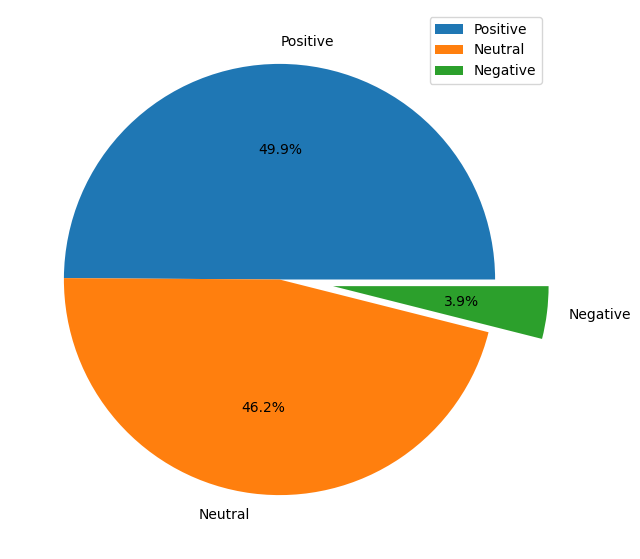

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

tb_count= fin_data.Analysis.value_counts()
plt.figure(figsize=(10, 7))
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.legend()

# **Sentiment Analysis Using Vader**

In [21]:
!pip install vadersentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment  
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

fin_data['Vader Sentiment'] = fin_data['Lemma'].apply(vadersentimentanalysis)

In [23]:
#Vader_Polarity = analyzer.polarity_scores((fin_data['Lemma'].sample(frac=0.25)))
#print(Vader_Polarity)

In [24]:
# function to analyse 
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
fin_data['Vader Analysis'] = fin_data['Vader Sentiment'].apply(vader_analysis)
fin_data.head()

,Cleaned Reviews,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis
0,Nice but price higher than jio mart,Nice price high jio mart,0.770000,0.380000,Neutral,0.4215,Neutral
1,good fresh products Well service On time deliv...,good fresh product Well service time deliver...,0.575000,0.600000,Positive,0.9217,Positive
2,Fast and easy using and ordering Will wait and...,Fast easy use order wait see delivery qualit...,0.716667,0.316667,Neutral,0.4404,Neutral
3,Fake one If u cancelled an order believe me th...,Fake one u cancel order believe refund yr am...,1.000000,-0.500000,Negative,-0.8020,Negative
4,Didn t enjoy shipping nothing I m really sugge...,enjoy ship nothing really suggest people dow...,0.200000,0.100000,Neutral,0.7003,Positive


In [25]:
fin_data['Vader Sentiment']

0         0.4215
1         0.9217
2         0.4404
3        -0.8020
4         0.7003
           ...  
235682    0.3089
235683    0.8923
235684    0.5719
235685    0.7964
235686    0.1027
Name: Vader Sentiment, Length: 235660, dtype: float64

In [26]:
vader_counts = fin_data['Vader Analysis'].value_counts()
vader_counts

Neutral     141545
Positive     76293
Negative     17822
Name: Vader Analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f41a473acd0>,
 [Text(-0.3730865296356828, 1.1405290182211072, 'Neutral'),
  Text(0.0863267922715395, -1.0966073522168756, 'Positive'),
  Text(1.0690998736048107, -0.25889275821887703, 'Negative')],
 [Text(-0.21763380895414827, 0.6653085939623126, '60.1%'),
  Text(0.047087341239021537, -0.5981494648455684, '32.4%'),
  Text(0.583145385602624, -0.14121423175575107, '7.6%')])

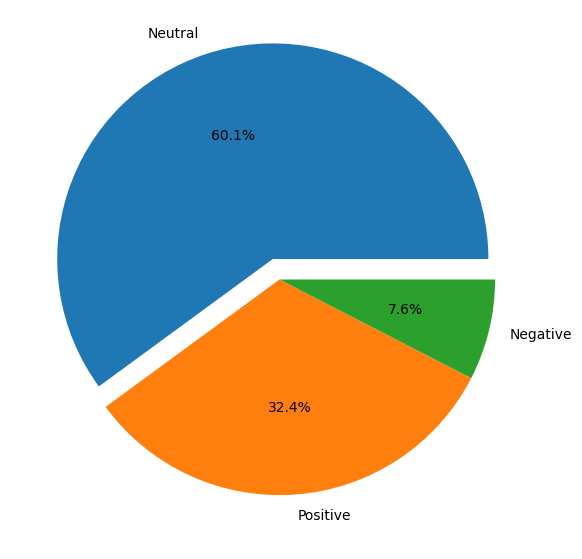

In [27]:
vader_counts= fin_data['Vader Analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0.1, 0, 0), autopct='%1.1f%%', shadow=False)
# plt.legend()

# Sentiment Analysis with senti **wordnet**

In [28]:
data['POS tagged'] =fin_data['Lemma'].apply(token_stop_pos)

In [29]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        #print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return "Unrecognized"
    if sentiment>=0.5:
        return "Positive"
    if sentiment<=-0.5:
        return "Negative"
    else:
        return "Neutral"

fin_data['SWN analysis'] = data['POS tagged'].apply(sentiwordnetanalysis)
fin_data.head()

[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


,Cleaned Reviews,Lemma,Subjectivity,Polarity,Analysis,Vader Sentiment,Vader Analysis,SWN analysis
0,Nice but price higher than jio mart,Nice price high jio mart,0.770000,0.380000,Neutral,0.4215,Neutral,Neutral
1,good fresh products Well service On time deliv...,good fresh product Well service time deliver...,0.575000,0.600000,Positive,0.9217,Positive,Positive
2,Fast and easy using and ordering Will wait and...,Fast easy use order wait see delivery qualit...,0.716667,0.316667,Neutral,0.4404,Neutral,Positive
3,Fake one If u cancelled an order believe me th...,Fake one u cancel order believe refund yr am...,1.000000,-0.500000,Negative,-0.8020,Negative,Negative
4,Didn t enjoy shipping nothing I m really sugge...,enjoy ship nothing really suggest people dow...,0.200000,0.100000,Neutral,0.7003,Positive,Positive


In [30]:
swn_counts= fin_data['SWN analysis'].value_counts()
swn_counts

Positive        110980
Neutral          84013
Unrecognized     20609
Negative         20058
Name: SWN analysis, dtype: int64

([<matplotlib.patches.Wedge at 0x7f418fccddf0>,
 [Text(0.10942893398022407, 1.195000129040977, 'Positive'),
  Text(-0.6511227382469026, -0.8865885064322996, 'Neutral'),
  Text(0.7588247430753265, -0.7963573376924864, 'Unrecognized'),
  Text(1.0609089930673659, -0.29064085815450674, 'Negative')],
 [Text(0.06383354482179737, 0.6970834086072365, '47.1%'),
  Text(-0.3551578572255832, -0.4835937307812543, '35.7%'),
  Text(0.41390440531381445, -0.4343767296504471, '8.7%'),
  Text(0.5786776325821995, -0.15853137717518548, '8.5%')])

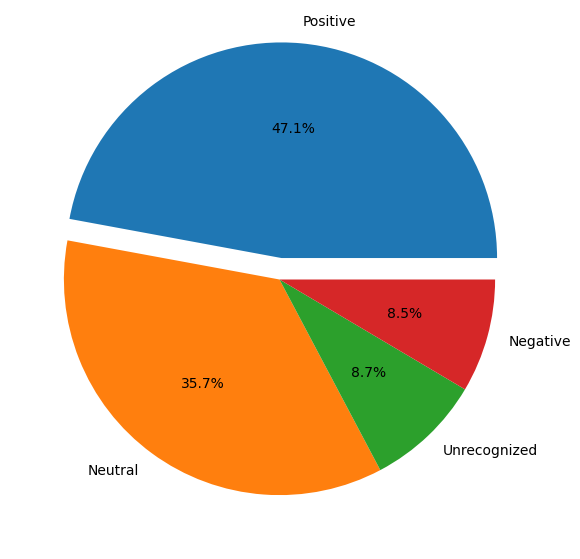

In [31]:
swn_counts= fin_data['SWN analysis'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0.1, 0, 0,0), autopct='%1.1f%%', shadow=False)
# plt.legend()